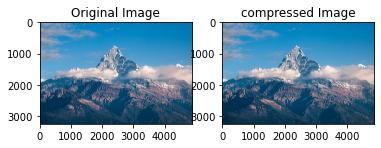

Original image size: 3108577 bytes
Compressed image size: 783422 bytes
Compression Ratio: 0.25201949316359223
Compression Rate: 74.79805068364078 percent


In [4]:
import numpy as np
import imageio
from PIL import Image
import matplotlib.pyplot as plt
import os

# Load the color image
image = Image.open("D:/altitude-clouds-cold-417173.jpg")

# Get the size of the original image
original_size = os.stat("D:/altitude-clouds-cold-417173.jpg").st_size

# Convert the image to the YCbCr color space
ycbcr_image = image.convert('YCbCr')

# Extract the Y, Cb, and Cr channels
y, cb, cr = ycbcr_image.split()

# Convert the channels to numpy arrays
y_arr = np.array(y)
cb_arr = np.array(cb)
cr_arr = np.array(cr)

# Combine the channels into a YCbCr image
ycbcr_image_arr = np.dstack((y_arr, cb_arr, cr_arr))

# Apply JPEG compression to the YCbCr image
compressed_image_path = "comprEessed_image.jpg"
imageio.imwrite(compressed_image_path, ycbcr_image_arr, format="jpeg")

# Get the size of the compressed image
compressed_size = os.stat(compressed_image_path).st_size

# Load the compressed image
decompressed_ycbcr_image_arr = imageio.imread(compressed_image_path, format="jpeg")

# Split the decompressed image into Y, Cb, and Cr channels
decompressed_y_arr = decompressed_ycbcr_image_arr[:, :, 0]
decompressed_cb_arr = decompressed_ycbcr_image_arr[:, :, 1]
decompressed_cr_arr = decompressed_ycbcr_image_arr[:, :, 2]

# Convert the channels back to PIL Image objects
decompressed_y = Image.fromarray(decompressed_y_arr)
decompressed_cb = Image.fromarray(decompressed_cb_arr)
decompressed_cr = Image.fromarray(decompressed_cr_arr)

# Merge the channels into a reconstructed YCbCr image
reconstructed_ycbcr_image = Image.merge('YCbCr', (decompressed_y, decompressed_cb, decompressed_cr))

# Convert the reconstructed image to RGB color space
reconstructed_image = reconstructed_ycbcr_image.convert('RGB')

# Display the original and reconstructed images
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image)
plt.title('compressed Image')

plt.show()

# Print the size of the original and compressed images
print(f"Original image size: {original_size} bytes")
print(f"Compressed image size: {compressed_size} bytes")


print(f"Compression Ratio: {compressed_size/original_size}")

print(f"Compression Rate: {(1-compressed_size/original_size)*100} percent" )

In [1]:
!pip install jpeg4py

In [2]:
pip install jpeg4py pillow

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install imageio pillow

Note: you may need to restart the kernel to use updated packages.
